In [1]:
import pandas as pd
import numpy as np

### Data Preperation

In [2]:
#import internal data
store_loc = pd.read_csv('stores.csv')
sales = pd.read_excel('Historical Sales.xlsx')

#merge the store_loc and sales dataframes on the Store Key column, in order to get store province and city
internal_data = pd.merge(store_loc[['City','Province','Store Key']], sales, on='Store Key')
internal_data.drop('Store Key', axis=1, inplace=True)

#convert the Sale Date column to two columns -> month and year
internal_data['Year'] = internal_data['Sale Date'].dt.year
internal_data['Month'] = internal_data['Sale Date'].dt.month
internal_data.drop(['Sale Date','Customer Key'], axis=1, inplace=True)

#sum the Total Amount column by doing a group by on the City, Province, Year and Month columns
internal_data = internal_data.groupby(['City','Province','Year','Month','Product Category Key']).sum().reset_index()

#rename the Total Amount column to Sales
internal_data.rename(columns={'Total Amount':'Sales'}, inplace=True)
internal_data

,City,Province,Year,Month,Product Category Key,Sales
0,Calgary,Alberta,2021,1,1,58.54
1,Calgary,Alberta,2021,1,2,90.16
2,Calgary,Alberta,2021,1,3,9.80
3,Calgary,Alberta,2021,1,4,185.57
4,Calgary,Alberta,2021,1,5,71.84
...,...,...,...,...,...,...
1367,Winnipeg,Manitoba,2024,1,1,78.12
1368,Winnipeg,Manitoba,2024,1,2,49.41
1369,Winnipeg,Manitoba,2024,1,3,103.56
1370,Winnipeg,Manitoba,2024,1,4,244.56


In [3]:
#get average demographics by province and city from External data
#get age province data --> Male to Female ratio by province and Total population by province
population_age = pd.read_csv('Population by Age and Province.csv')[['Province','Average age','All ages']]
population_age['Province Population Size'] = population_age['All ages'].replace(',', '', regex=True).astype(int)
population_age['Province Average Age'] = population_age['Average age']
population_age = population_age.drop(['Average age','All ages'], axis=1)

#get gender province data --> Average age by province
population_Gender = pd.read_csv('Population by Gender and Province.csv')
population_Gender['Males'] = population_Gender['Males'].replace(',', '', regex=True).astype(int)
population_Gender['Females'] = population_Gender['Females'].replace(',', '', regex=True).astype(int)
# Calculate the 'M to F ratio'
population_Gender['Province M to F ratio'] = population_Gender['Males'] / population_Gender['Females']
population_Gender.drop(['Males','Females'], axis=1, inplace=True)

#get province university data --> Total Enrollment by province
population_edu = pd.read_excel("Canadian University Enrollement_by province.xlsx")
population_edu = population_edu[['Province','Total Enrollment']]
population_edu.rename(columns={'Total Enrollment':'Province Total University Enrollment'}, inplace=True)

#get city demographics data --> Number of Dwellings by city
Cities_demographics = pd.read_csv('Number of Dwellings by City.csv')
Cities_demographics['Number of Dwellings'] = Cities_demographics['Number of Dwellings'].replace(',', '', regex=True).astype(int)

#get city income data --> Median Household Income by city
cities_income = pd.read_csv('Median Household Income by City.csv')
cities_income['Median House-hold Income'] = cities_income['Median House-hold Income'].replace(',', '', regex=True).astype(int)

#merge all province data on Province
province_data = pd.merge(population_age, population_Gender, on='Province')
province_data = pd.merge(province_data, population_edu, on='Province')
province_data = pd.merge(province_data, Cities_demographics, on='Province')
province_data = pd.merge(province_data, cities_income, on=['Province','City'])
province_data['City'] = province_data['City'].str.strip()
province_data['Province'] = province_data['Province'].str.strip()
province_data

,Province,Province Population Size,Province Average Age,Province M to F ratio,Province Total University Enrollment,City,Number of Dwellings,Median House-hold Income
0,Prince Edward Island,170688,42.2,0.987101,5810,Charlottetown,32945,76500
1,Prince Edward Island,170688,42.2,0.987101,5810,Summerside,7950,64500
2,Nova Scotia,1019725,43.8,0.964391,52270,Cape Breto,43800,62000
3,Nova Scotia,1019725,43.8,0.964391,52270,Halifax,201140,81000
4,Nova Scotia,1019725,43.8,0.964391,52270,Kentville,11940,67000
...,...,...,...,...,...,...,...,...
141,British Columbia,5319324,42.8,0.976897,186124,Trail,6515,76000
142,British Columbia,5319324,42.8,0.976897,186124,Vancouver,1043320,90000
143,British Columbia,5319324,42.8,0.976897,186124,Vernon,28725,79000
144,British Columbia,5319324,42.8,0.976897,186124,Victoria,176675,85000


In [4]:
#merge internal data and province data on Province and City
final_data = pd.merge(internal_data, province_data, on=['City','Province'], how='left')
final_data

,City,Province,Year,Month,Product Category Key,Sales,Province Population Size,Province Average Age,Province M to F ratio,Province Total University Enrollment,Number of Dwellings,Median House-hold Income
0,Calgary,Alberta,2021,1,1,58.54,4543111,39.0,1.009252,158320,563440,100000
1,Calgary,Alberta,2021,1,2,90.16,4543111,39.0,1.009252,158320,563440,100000
2,Calgary,Alberta,2021,1,3,9.80,4543111,39.0,1.009252,158320,563440,100000
3,Calgary,Alberta,2021,1,4,185.57,4543111,39.0,1.009252,158320,563440,100000
4,Calgary,Alberta,2021,1,5,71.84,4543111,39.0,1.009252,158320,563440,100000
...,...,...,...,...,...,...,...,...,...,...,...,...
1367,Winnipeg,Manitoba,2024,1,1,78.12,1409223,39.3,0.999258,43140,330325,83000
1368,Winnipeg,Manitoba,2024,1,2,49.41,1409223,39.3,0.999258,43140,330325,83000
1369,Winnipeg,Manitoba,2024,1,3,103.56,1409223,39.3,0.999258,43140,330325,83000
1370,Winnipeg,Manitoba,2024,1,4,244.56,1409223,39.3,0.999258,43140,330325,83000


In [8]:
All_Cities = province_data[['City','Province']].drop_duplicates()
All_Cities.to_csv('All_Cities.csv', index=False)

#save unique provinces to a csv file too
unique_provinces = province_data['Province'].drop_duplicates()
unique_provinces.to_excel('All_Provinces.xlsx', index=False)

All_Cities

,City,Province
0,Charlottetown,Prince Edward Island
1,Summerside,Prince Edward Island
2,Cape Breto,Nova Scotia
3,Halifax,Nova Scotia
4,Kentville,Nova Scotia
...,...,...
141,Trail,British Columbia
142,Vancouver,British Columbia
143,Vernon,British Columbia
144,Victoria,British Columbia


### Model Testing

In [153]:
df = final_data.drop(['City','Province'], axis=1)

#split data into 20% test and 80% train with a random state of 42 and the target being the Sales column
from sklearn.model_selection import train_test_split
X = df.drop('Sales', axis=1)
y = df['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [154]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Linear Regression
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)
linear_reg_predictions = linear_reg_model.predict(X_test)

# Decision Tree Regressor
dt_reg_model = DecisionTreeRegressor(random_state=42)
dt_reg_model.fit(X_train, y_train)
dt_reg_predictions = dt_reg_model.predict(X_test)

# Random Forest Regressor
rf_reg_model = RandomForestRegressor(random_state=42)
rf_reg_model.fit(X_train, y_train)
rf_reg_predictions = rf_reg_model.predict(X_test)

# Gradient Boosting Regressor
gb_reg_model = GradientBoostingRegressor(random_state=42)
gb_reg_model.fit(X_train, y_train)
gb_reg_predictions = gb_reg_model.predict(X_test)

# Evaluate models
def evaluate_model(predictions, y_true):
    mse = mean_squared_error(y_true, predictions)
    r2 = r2_score(y_true, predictions)
    return mse, r2

linear_reg_mse, linear_reg_r2 = evaluate_model(linear_reg_predictions, y_test)
dt_reg_mse, dt_reg_r2 = evaluate_model(dt_reg_predictions, y_test)
rf_reg_mse, rf_reg_r2 = evaluate_model(rf_reg_predictions, y_test)
gb_reg_mse, gb_reg_r2 = evaluate_model(gb_reg_predictions, y_test)

# Display results
print("Linear Regression - MSE:", linear_reg_mse, " R^2:", linear_reg_r2)
print("Decision Tree Regressor - MSE:", dt_reg_mse, " R^2:", dt_reg_r2)
print("Random Forest Regressor - MSE:", rf_reg_mse, " R^2:", rf_reg_r2)
print("Gradient Boosting Regressor - MSE:", gb_reg_mse, " R^2:", gb_reg_r2)


Linear Regression - MSE: 7514.961515018047  R^2: 0.028770000815065755
Decision Tree Regressor - MSE: 14686.385274909091  R^2: -0.8980613447020871
Random Forest Regressor - MSE: 7945.842921699165  R^2: -0.02691690422408821
Gradient Boosting Regressor - MSE: 7417.814078321164  R^2: 0.041325288646597014


<Axes: xlabel='Importance', ylabel='Feature'>

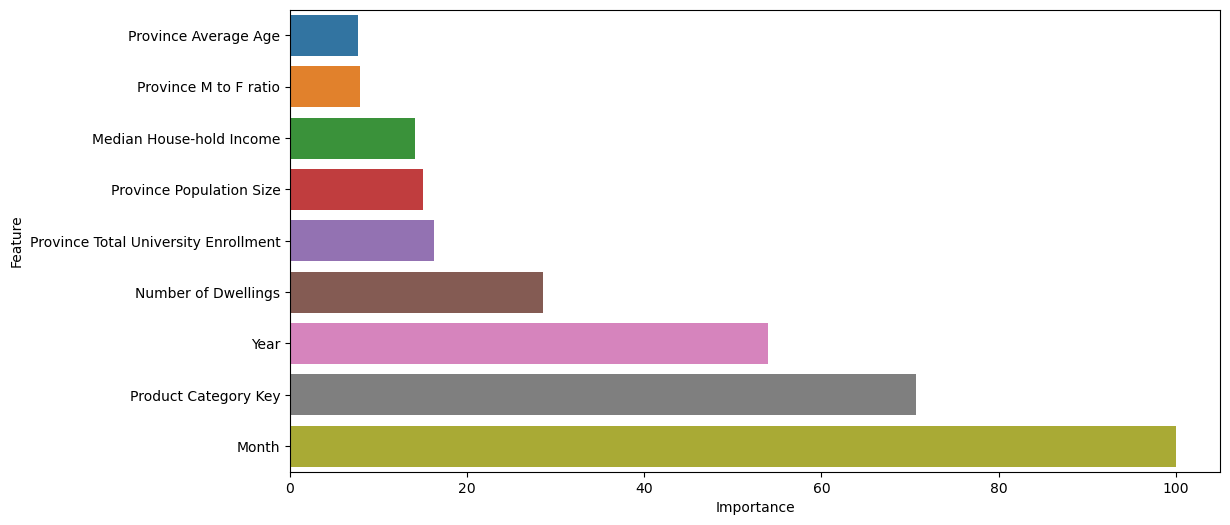

In [155]:
## according to the above results, the Gradient Boosting Regressor model is the best model to use as it has the lowest MSE
## however, I want to assess if all features are important to include
#plot random forest regressor feature importance
import matplotlib.pyplot as plt
import seaborn as sns
feature_importance = rf_reg_model.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure(figsize=(12, 6))

rf_feature_importance = pd.DataFrame({'Feature':X_train.columns[sorted_idx], 'Importance':feature_importance[sorted_idx]})
sns.barplot(x='Importance', y='Feature', data=rf_feature_importance)

In [156]:
## According to the feature importance plotted above, the Province average age and province male to female ratio are the least
## important factors, thus they may be causing some noise in the model. We can remove them and retrain the model to see if the
## model performance improves

df = df.drop(['Province Average Age','Province M to F ratio'], axis=1)
X = df.drop('Sales', axis=1)
y = df['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Gradient Boosting Regressor
gb_reg_model = GradientBoostingRegressor(random_state=42)
gb_reg_model.fit(X_train, y_train)
gb_reg_predictions = gb_reg_model.predict(X_test)

#print the new model performance
gb_reg_mse, gb_reg_r2 = evaluate_model(gb_reg_predictions, y_test)
print("Gradient Boosting Regressor - MSE:", gb_reg_mse, " R^2:", gb_reg_r2)
#according to the below results, the gradient booster has a test lower mse when the province average age and province m to f ratio
#are removed from the model, thus I will continue to exclude them from the results

Gradient Boosting Regressor - MSE: 7361.360509528035  R^2: 0.04862132063070834


### Generating the Forecasts for the next year

In [168]:
# I will first create a test set with all the cities and provinces in the province data, along with the the year 2024 and all months and categories
# I will then predict the monthly sales for each city and province in the test set...that way I have forecasted sales for all cities and provinces
# as well as categories for the year 2024
test_set = pd.DataFrame()
test_set['Year'] = [2024]*12*len(All_Cities)*len(df['Product Category Key'].unique())
test_set['Month'] = list(range(1,13))*len(All_Cities)*len(df['Product Category Key'].unique())
test_set['Product Category Key'] = list(df['Product Category Key'].unique())*12*len(All_Cities)
test_set['Province'] = All_Cities['Province'].tolist()*12*len(df['Product Category Key'].unique())
test_set['City'] = All_Cities['City'].tolist()*12*len(df['Product Category Key'].unique())

test_set = pd.merge(test_set, province_data, on=['City','Province'], how='left')
test_set.drop(['Province Average Age','Province M to F ratio'], axis=1, inplace=True)
test_set

,Year,Month,Product Category Key,Province,City,Province Population Size,Province Total University Enrollment,Number of Dwellings,Median House-hold Income
0,2024,1,1,Prince Edward Island,Charlottetown,170688,5810,32945,76500
1,2024,2,2,Prince Edward Island,Summerside,170688,5810,7950,64500
2,2024,3,3,Nova Scotia,Cape Breto,1019725,52270,43800,62000
3,2024,4,4,Nova Scotia,Halifax,1019725,52270,201140,81000
4,2024,5,5,Nova Scotia,Kentville,1019725,52270,11940,67000
...,...,...,...,...,...,...,...,...,...
8755,2024,8,1,British Columbia,Trail,5319324,186124,6515,76000
8756,2024,9,2,British Columbia,Vancouver,5319324,186124,1043320,90000
8757,2024,10,3,British Columbia,Vernon,5319324,186124,28725,79000
8758,2024,11,4,British Columbia,Victoria,5319324,186124,176675,85000


In [169]:
# train the model on the entire dataset
gb_reg_model = GradientBoostingRegressor(random_state=42)
gb_reg_model.fit(X, y)

#generate predictions
to_test = test_set.drop(['City','Province'], axis=1)
predictions = gb_reg_model.predict(to_test)
test_set['Sales'] = predictions

test_set

,Year,Month,Product Category Key,Province,City,Province Population Size,Province Total University Enrollment,Number of Dwellings,Median House-hold Income,Sales
0,2024,1,1,Prince Edward Island,Charlottetown,170688,5810,32945,76500,87.191720
1,2024,2,2,Prince Edward Island,Summerside,170688,5810,7950,64500,91.525337
2,2024,3,3,Nova Scotia,Cape Breto,1019725,52270,43800,62000,101.521898
3,2024,4,4,Nova Scotia,Halifax,1019725,52270,201140,81000,99.514628
4,2024,5,5,Nova Scotia,Kentville,1019725,52270,11940,67000,102.590323
...,...,...,...,...,...,...,...,...,...,...
8755,2024,8,1,British Columbia,Trail,5319324,186124,6515,76000,88.109387
8756,2024,9,2,British Columbia,Vancouver,5319324,186124,1043320,90000,102.423556
8757,2024,10,3,British Columbia,Vernon,5319324,186124,28725,79000,102.495151
8758,2024,11,4,British Columbia,Victoria,5319324,186124,176675,85000,100.567478


In [170]:
test_set.to_csv('2024 Forecasted Sales.csv', index=False)